In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import accuracy_score
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [158]:
iris = pd.read_csv("iris.csv")
iris.drop('Id',axis=1,inplace=True)
print(iris.shape)
iris.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [159]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [160]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

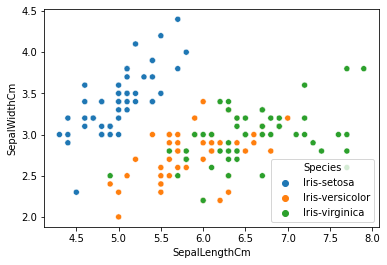

In [161]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species')

In [162]:
x = iris.iloc[:, [0, 1, 2, 3]].values

In [163]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 20)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

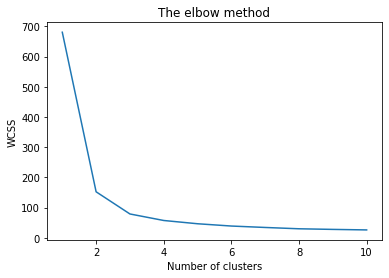

In [164]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [165]:
SelectedK = 3
kmeans = KMeans(n_clusters = SelectedK, random_state = 20)
y_kmeans = kmeans.fit_predict(x)

In [166]:
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


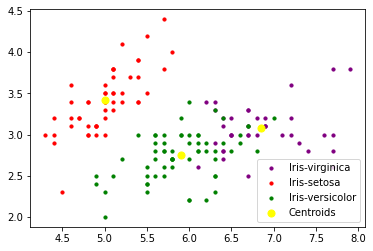

In [167]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'purple', label = 'Iris-virginica')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Iris-versicolor')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'Yellow', label = 'Centroids')

plt.legend()

In [168]:
YPred = []
for i in range(0, len(y_kmeans)):
    if y_kmeans[i] == 2:
        YPred.append('Iris-versicolor')
    elif y_kmeans[i] == 1:
        YPred.append('Iris-setosa')
    else:
        YPred.append('Iris-virginica')

print("accuracy_score: ", accuracy_score(YPred, iris['Species']))


accuracy_score:  0.8933333333333333
